Import the necessary libraries and set the environment.

In [ ]:
#StandardScaler standardizes features by removing the mean and scaling to unit variance
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
from scipy.stats import zscore

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: Load the data from the CSV file
file_path = '/content/drive/MyDrive/zidio/Mall_Customers.csv'  # Replace with your file path
df = pd.read_csv(file_path)

print("Original DataFrame:")
print(df)

# Check for missing values
print(df.isnull().sum())

# Step 3: Check for duplicates
print("\nDuplicated rows:")
print(df.duplicated())

# df.drop_duplicates(['CustomerID'])


Original DataFrame:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
CustomerID                0
Genre                     0
Age                     

Preprocessing

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


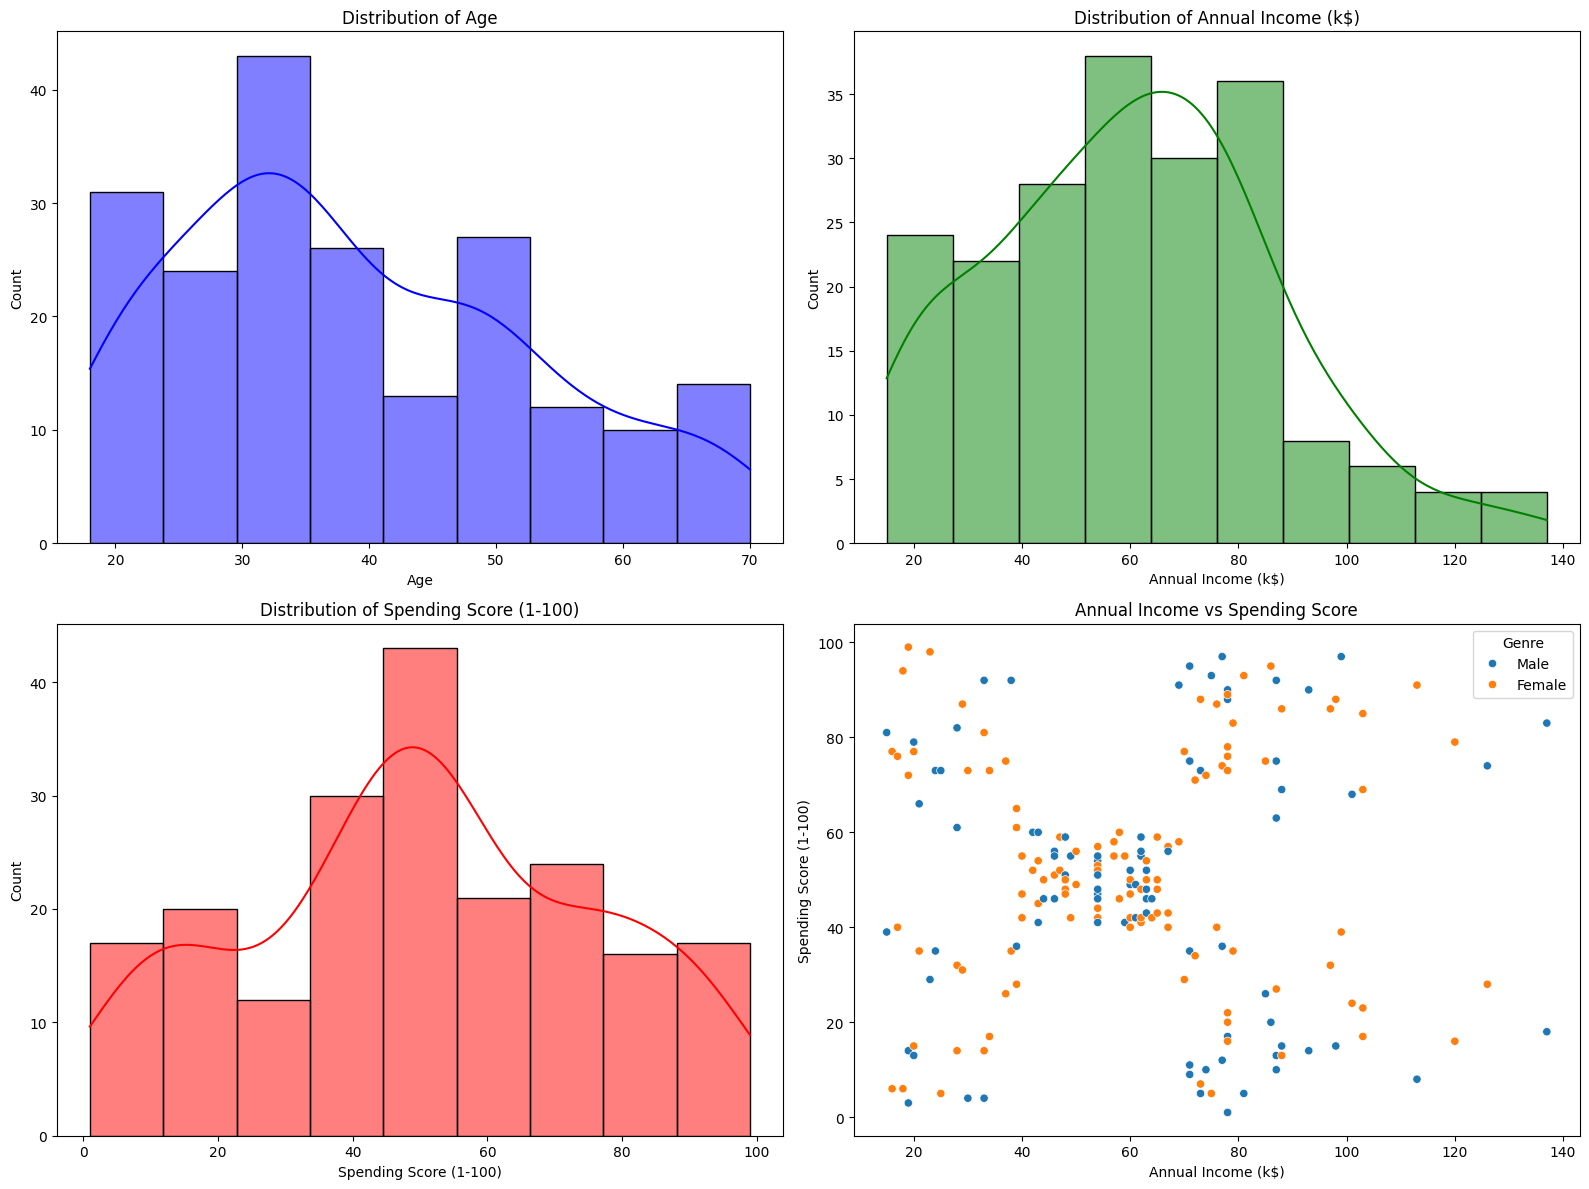

In [ ]:
# Create subplots for visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for Age
sns.histplot(df['Age'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Age')

# Histogram for Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Annual Income (k$)')

# Histogram for Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribution of Spending Score (1-100)')

# Scatter plot for Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()

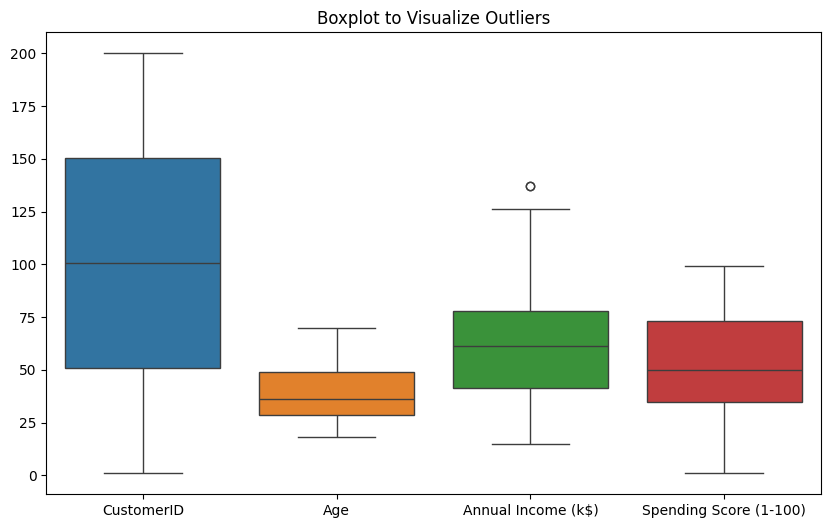

In [ ]:
# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplot to Visualize Outliers')
plt.show()


In [ ]:
# Calculate Z-scores
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for Z-scores, typically 3
threshold = 2

# Identify rows where any Z-score is above the threshold
outliers_zscore = (z_scores > threshold).any(axis=1)

#print("\nRows identified as outliers by Z-score:")
#print(df[outliers_zscore])

# Remove outliers
df_no_outliers = df[~outliers_zscore]

print("\nDataFrame after removing Z-score outliers:")
print(df_no_outliers)



DataFrame after removing Z-score outliers:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
187         188    Male   28                 101                      68
188         189  Female   41                 103                      17
189         190  Female   36                 103                      85
190         191  Female   34                 103                      23
191         192  Female   32                 103                      69

[182 rows x 5 columns]


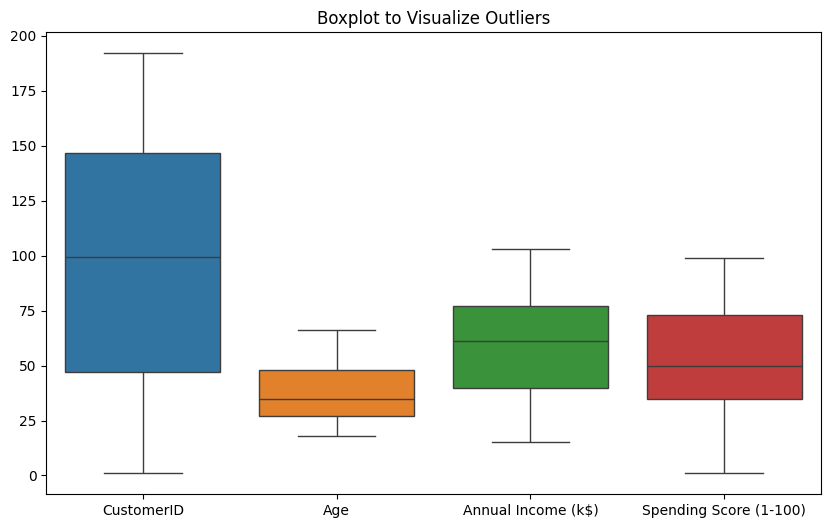

In [ ]:
# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers.select_dtypes(include=[np.number]))
plt.title('Boxplot to Visualize Outliers')
plt.show()

Re

In [ ]:
# Step x: Calculate IQR
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Step : Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -13.25
Upper Bound: 132.75
137 is an outlier.


In [ ]:
# Remove outliers
df_cleaned = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

# Print the cleaned DataFrame
print("DataFrame after removing outliers:")
print(df_cleaned)

DataFrame after removing outliers:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74

[198 rows x 5 columns]


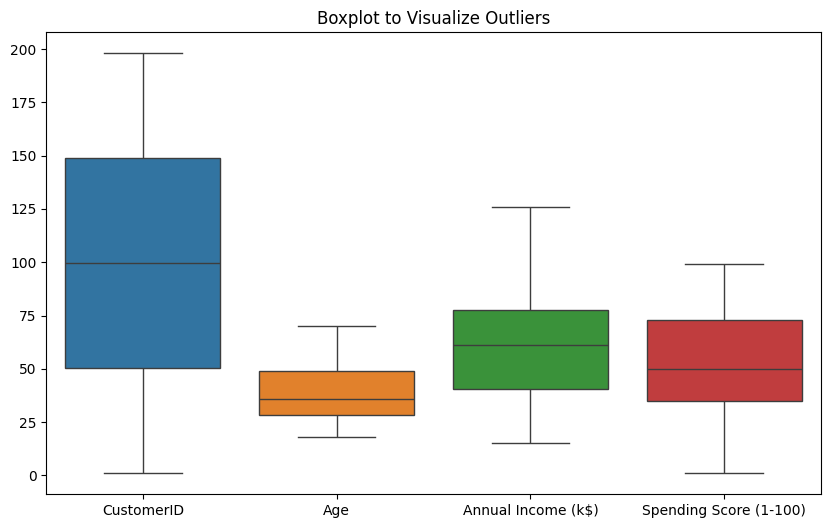

In [ ]:
# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned.select_dtypes(include=[np.number]))
plt.title('Boxplot to Visualize Outliers')
plt.show()

Applying k-mean algo :
KMeans is an algorithm that partitions data into K clusters by minimizing the sum of squared distances between data points and the centroid of their assigned cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

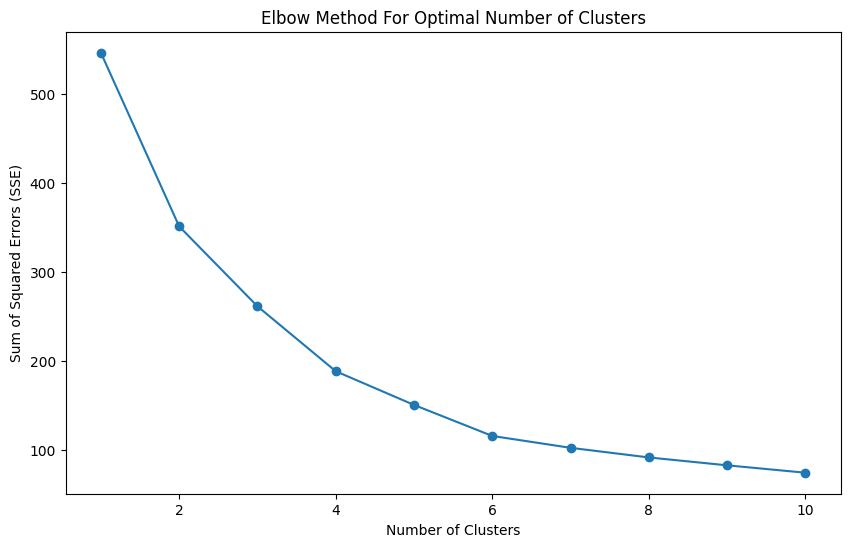

In [ ]:
# Step 5: Use the elbow method to determine the optimal number of clusters
features = df_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

Assigning new data points to clusters: After training the model, you can use the cluster centers to assign new data points to the nearest cluster based on their distances to the centroids.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-46-962490a0675b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster'] = kmeans.fit_predict(scaled_features)



Cluster Centers:
[[-0.37487607  1.01333656  1.22462483]
 [ 0.54307193 -1.37630607 -1.21892998]
 [ 1.13284614 -0.1795126  -0.05904729]
 [ 0.61255481  1.11725948 -1.22509242]
 [-0.92536151 -1.35591705  0.99595137]
 [-0.99768033  0.04431834 -0.2544888 ]]


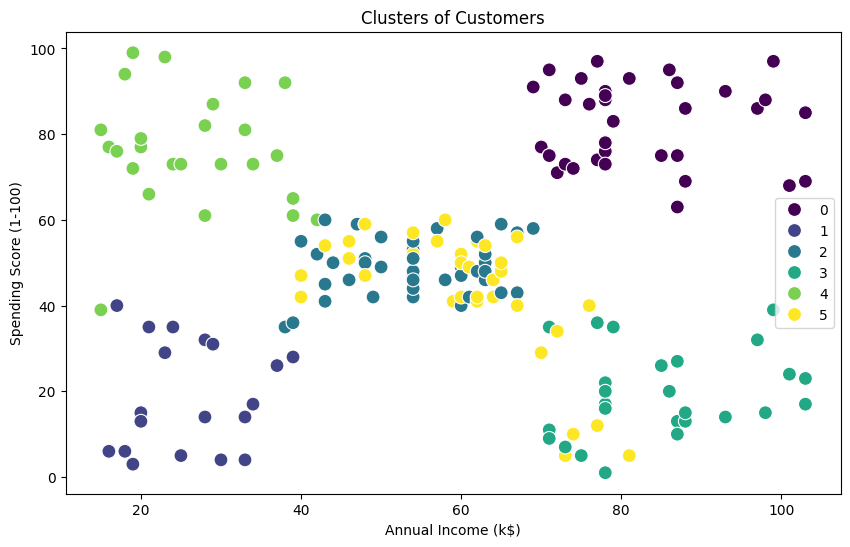

In [ ]:
# Step x: Apply K-means clustering and evaluate the model
# Choose the optimal number of clusters from the elbow plot, say it's 5
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_no_outliers['Cluster'] = kmeans.fit_predict(scaled_features)


# Print cluster centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



 t-SNE (t-distributed Stochastic Neighbor Embedding) used for dimention reduction (PCA LDA) and visualization

<ipython-input-53-ffccc8fbcfe6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-53-ffccc8fbcfe6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['tsne-2d-two'] = tsne_results[:,1]


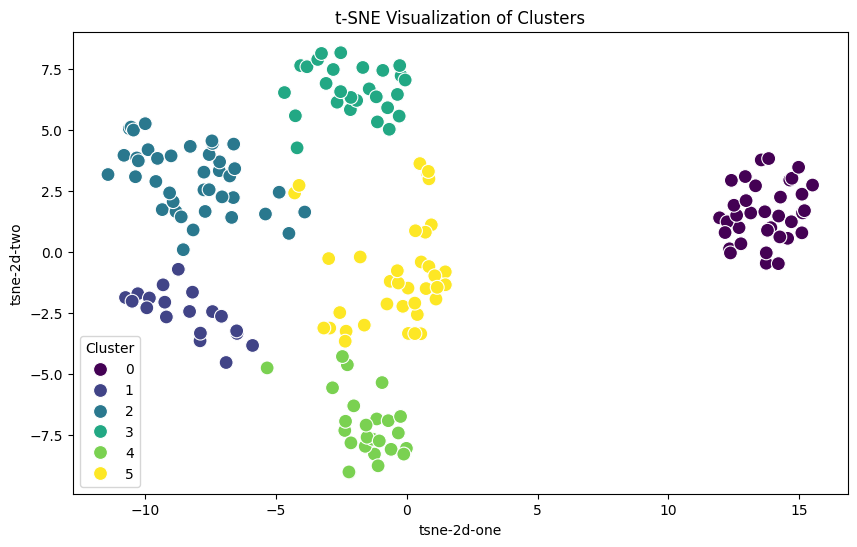

In [ ]:
# Visualize the clusters with t-SNE
tsne = TSNE(n_components=2, random_state=15)
tsne_results = tsne.fit_transform(scaled_features)

df_no_outliers['tsne-2d-one'] = tsne_results[:,0]
df_no_outliers['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='tsne-2d-one', y='tsne-2d-two', hue='Cluster', palette='viridis', s=100)
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [ ]:
# Access cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Access cluster labels
print("Cluster Labels:")
print(kmeans.labels_)

# Access inertia (sum of squared distances of samples to their closest cluster center)
print("Inertia:", kmeans.inertia_)



Cluster Centers:
[[-0.37487607  1.01333656  1.22462483]
 [ 0.54307193 -1.37630607 -1.21892998]
 [ 1.13284614 -0.1795126  -0.05904729]
 [ 0.61255481  1.11725948 -1.22509242]
 [-0.92536151 -1.35591705  0.99595137]
 [-0.99768033  0.04431834 -0.2544888 ]]
Cluster Labels:
[4 4 1 4 1 4 1 4 1 4 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 2 4 2 4 1 4 2 5 5 5 2 4 5 2 2 2 2 5 2 5 2 2 5 2 5 5 2 2 2 2 5 2 2 5 2
 2 2 2 5 2 2 5 5 2 5 2 2 5 5 2 5 2 5 5 2 5 2 5 2 2 2 2 5 5 5 5 5 2 2 2 2 5
 5 2 0 5 0 3 0 3 0 3 0 5 0 5 0 3 0 5 0 3 0 5 0 5 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 5 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]
Inertia: 115.30524482447537


**Inertia** **is a measure of how tightly the clusters are packed together.**
It is the sum of squared distances of samples to their closest cluster center.
**Lower inertia values indicate better clustering results**, as it suggests that the data points are closer to their cluster centers.
Inertia is used as an internal evaluation metric for assessing the quality of the clustering.

The silhouette score is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better-defined clusters, where data points are closer to other data points in the same cluster and farther away from data points in other clusters.

In [ ]:
# Evaluate the model
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, kmeans.labels_)
print(f'\nSilhouette Score: {score}')


Silhouette Score: 0.4433290037833302
